# Exercise 3
All previous instructions hold. In addition, if you are using GPU, you must check that your code also runs on a CPU. 

**Make sure you use the best practices you learned in class**.

In [1]:
import sys

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:

from sklearn.metrics import confusion_matrix
from typing import List
from typing import TypedDict # <- relevant from python 3.8

# Convolutional Neural Network - Classifiying CIFAR-10 (40 points)

So far we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very messy for large complex networks.

Thankfully, we can use **automatic differentiation** to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph. Nodes in the graph will be Tensors,
and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

If we want to compute gradients with respect to some Tensor, then we set `requires_grad=True` when constructing that Tensor. Any PyTorch operations on that Tensor will cause a computational graph to be constructed, allowing us to later perform backpropagation through the graph. If `x` is a Tensor with `requires_grad=True`, then after backpropagation `x.grad` will be another Tensor holding the gradient of `x`.

Sometimes you may wish to prevent PyTorch from building computational graphs when performing certain operations on Tensors with `requires_grad=True`; for example, we usually don't want to backpropagate through the weight update steps when evaluating a neural network. In such scenarios we can use the `torch.no_grad()` context manager to prevent the construction of a computational graph.

In this exercise, you will accomplish the following:
1. Train a convolutional network using PyTorch.
2. Evaluate your model using a confusion matrix.
3. Solve the localization task using regression.

## Setup

### Data Preprocessing

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Image shape:  torch.Size([3, 32, 32])
     plane       ship        cat       deer


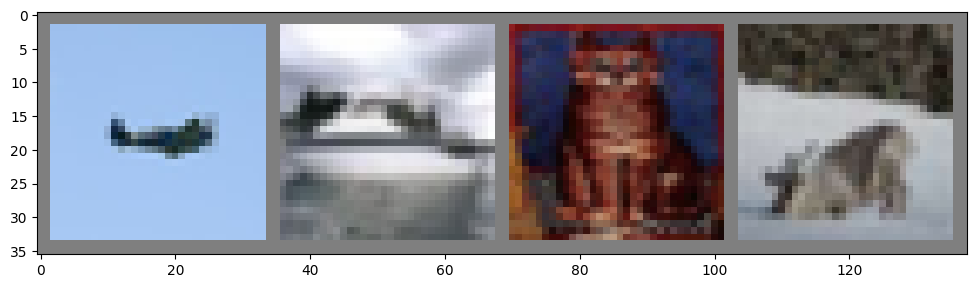

In [5]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # plt accepts images in the format (w,h,c)
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print("Image shape: ", images[0].shape)
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))

### Construct a CNN in PyTorch

In the following class, initiate your different layers in the `__init__` method and define your architecture in the `forward` method. Make sure the `forward` method has a single return value. 

1. Make good use of the documentation and experiment will different layers, activations and architectures, batch sizes, regularization, filter sizes, dimensions, number of layers and whatever you learned in class. 
2. Use your intuition from the previous exercises and additional sources such as the stackoverflow, Medium, etc. - **do not try to perform a massive grid search.**
3. **Include only your chosen architecture**. During experimentation, you may add as many cells as you need. Make sure to delete them before submission.
4. It is not allowed to use famous models that have been already implemented by PyTorch (resnet, densenet, alexnet, etc).
5. Make sure your code runs reasonably fast (no more than 15 minutes on CPU).
6. Use the best architecture you find and train it for 1-10 epochs. 
7. Visualize the loss and accuracy of your network during training. You can use matplotlib.
8. You should get above 60% accuracy on the test set.
**(20 points)**

## Go Model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #############################################################################
        # TO DO:                                                                    #
        # Initiate the different layers you wish to use in your network.            #
        # This method has no return value.                                          #
        #############################################################################
        
        
        ###################### TODO: set the numbers here with comments ... not maic numbers   <-------------------------
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=4)
        self.pool = nn.MaxPool2d(2, 2)  # nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 10)

        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        
    def forward(self, x):
        #############################################################################
        # TO DO:                                                                    #
        # Define the forward propagation. You need to pass an image through the     #
        # network and obtain class predictions.                                     #
        # This function returns the predication of your model.                      #
        #############################################################################
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        return x
        
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################


In [7]:
net = Net()

In [8]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

In [9]:
criterion = None
optimizer = None
#############################################################################
# TO DO:                                                                    #
# Define the loss function and optimizer.                                   # 
#############################################################################

# Define number of epochs
NUM_OF_EPOCHS = 10  

# Choose Loss function
criterion = nn.CrossEntropyLoss()  # nn.CrossEntropyLoss()

# Choose optimizer params + optimizer algorithm
optimizer_hps = {
    'lr': 0.01,  # 0.01 
    'momentum': 0.9,
}
optimizer = optim.SGD(net.parameters(), **optimizer_hps)

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

## Train

In [10]:
%%time
#############################################################################
# TO DO:                                                                    #
# Define the training loop as seen in class and as demonstrated in the      #
# documentation. Note, if you are using GPU, make sure your code runs on    #
# CPU also. Code that cannot run will not be tested.                        # 
#############################################################################

class TrainOutputFormat(TypedDict):
    avg_losses: List[float]
    total_accuracies: List[float]

def train_model(dataloader, num_samples: int, num_epochs: int = 2,) -> TrainOutputFormat:
    print('Begin Training')
    
    avg_loss_per_epoch_list = []
    avg_accuracy_per_epoch_list = []

    for index, epoch in enumerate(range(num_epochs)): 

        running_loss = 0.0
        
        loss_per_minibatch_list = []
        correct_preds_per_minibatch = []
        
        for i, data in enumerate(dataloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = net(inputs)
            
            # backward + optimize
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # get correct predictions
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            
            # save loss results
            loss_per_minibatch_list.append(loss.item())
            
            # save accuracy results
            correct_preds_per_minibatch.append(correct)
        
        # save loss in epoch
        avg_loss_this_epoch = np.mean(loss_per_minibatch_list).item()
        avg_loss_per_epoch_list.append(avg_loss_this_epoch)
        
        # save accuracy in epoch
        total_correct_preds_this_epoch = np.sum(correct_preds_per_minibatch).item()
        accuracy = 100 * total_correct_preds_this_epoch / num_samples   # TODO::: <-------- verify len(dataloader)
        avg_accuracy_per_epoch_list.append(accuracy)
        
        # print
        print(f'* epoch {index} complete. accuracy {accuracy} avg_loss_this_epoch {avg_loss_this_epoch}')
    
    #
    print('Finished Training')
    output: TrainOutputFormat = {
        'avg_losses': avg_loss_per_epoch_list,
        'total_accuracies': avg_accuracy_per_epoch_list,
    }
    return output



CPU times: user 150 µs, sys: 72 µs, total: 222 µs
Wall time: 230 µs


In [11]:
%%time
# Run training

train_output_format = train_model(dataloader=trainloader, num_samples=len(trainset), num_epochs=NUM_OF_EPOCHS)


#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

Begin Training
* epoch 0 complete. accuracy 30.042 avg_loss_this_epoch 1.886531458029052
* epoch 1 complete. accuracy 47.268 avg_loss_this_epoch 1.45048813914399
* epoch 2 complete. accuracy 53.896 avg_loss_this_epoch 1.2857589406887893
* epoch 3 complete. accuracy 57.814 avg_loss_this_epoch 1.1906107120654161
* epoch 4 complete. accuracy 60.986 avg_loss_this_epoch 1.1082562913217813
* epoch 5 complete. accuracy 63.688 avg_loss_this_epoch 1.038618956380488
* epoch 6 complete. accuracy 65.51 avg_loss_this_epoch 0.977821537829421
* epoch 7 complete. accuracy 67.308 avg_loss_this_epoch 0.9317990603196956
* epoch 8 complete. accuracy 68.992 avg_loss_this_epoch 0.8865740571333014
* epoch 9 complete. accuracy 70.37 avg_loss_this_epoch 0.8481013193307325
Finished Training
CPU times: user 1min 57s, sys: 7.95 s, total: 2min 5s
Wall time: 4min 10s


In [12]:
def plot_graph(res: list, graph_type: str):  # , n_epochs: int  ... == len(res)
    # plt.figure(0)
    plt.plot(list(range(len(res))), res, 'r--', label=graph_type)
    plt.title(f'{graph_type} change per epoch over train data')  #     plt.title(f'{graph_type} change per epoch\nnum of epochs: {n_epochs}. \nhps: {}')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(graph_type)
    plt.show()

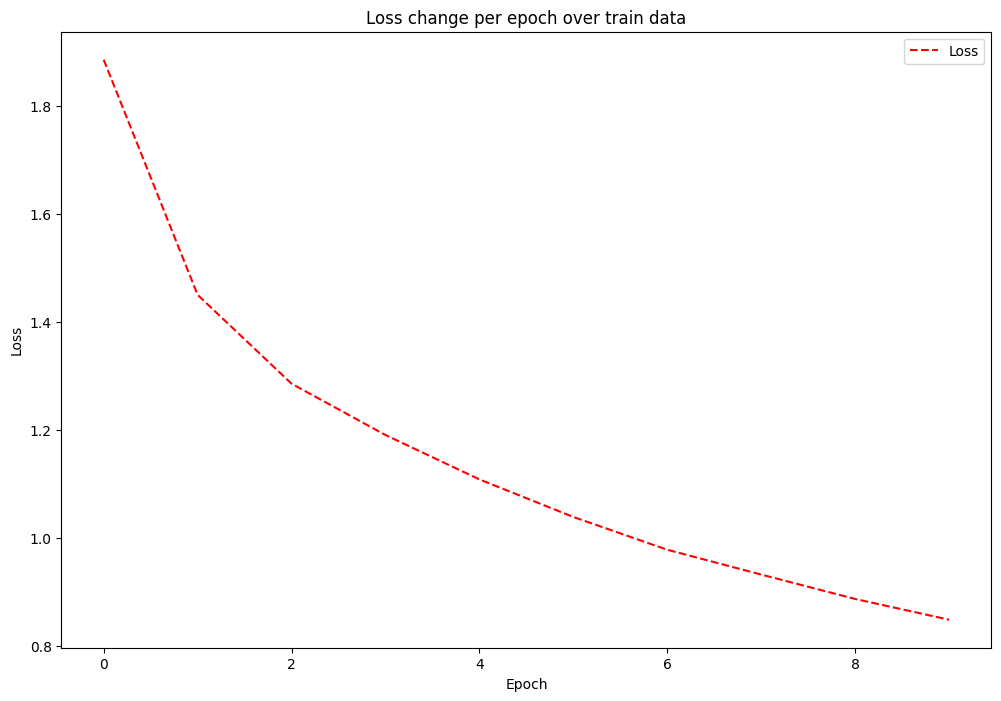

CPU times: user 324 ms, sys: 35.6 ms, total: 360 ms
Wall time: 251 ms


In [13]:
%%time
plot_graph(res=train_output_format['avg_losses'], graph_type='Loss')

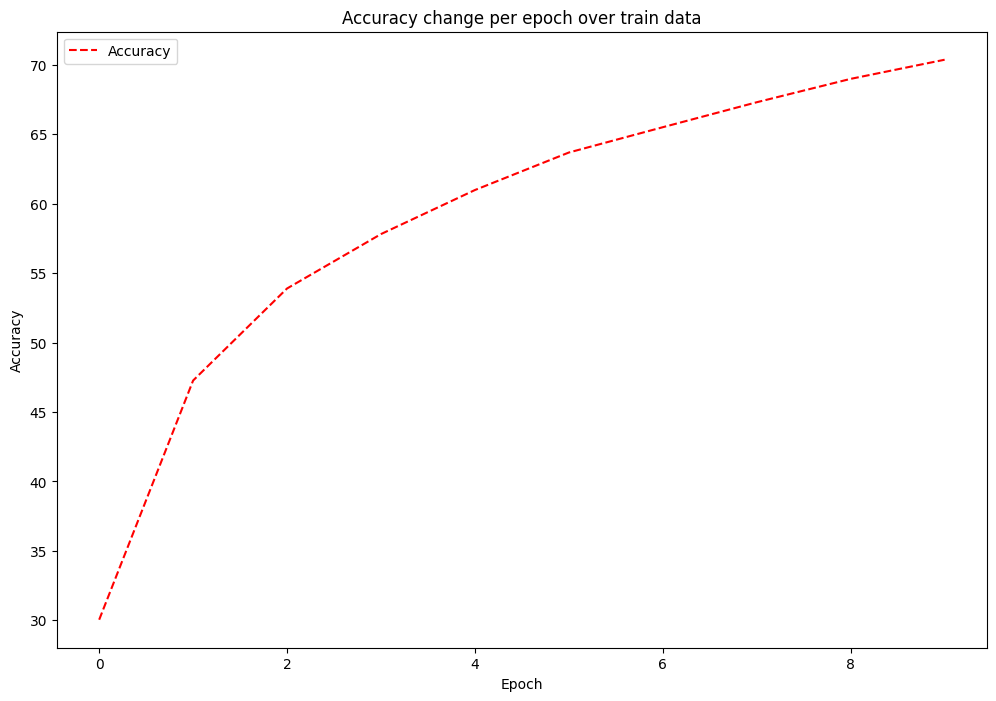

CPU times: user 314 ms, sys: 27.2 ms, total: 342 ms
Wall time: 232 ms


In [14]:
%%time
plot_graph(res=train_output_format['total_accuracies'], graph_type='Accuracy')

## Model evaluation

Calculate the model accuracy and print a confusion matrix where in y axis represents the real category and the x axis represents the predicted category. **(10 points)** 

In [15]:
confusion_matrix = np.zeros([10,10], int)
model_accuracy = 0
#############################################################################
# TO DO:                                                                    #
# Define the evaluation loop as seen in class and as demonstrated in the    #
# documentation and use the confusion matrix to evaluate your model.        # 
#############################################################################

def calculate_cm(dataloader, classes):
    num_of_classes = len(classes)  # <- global ?
    confusion_matrix = torch.zeros(num_of_classes, num_of_classes)
    with torch.no_grad():
        
        for data in dataloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            for l, p in zip(labels.view(-1), predicted.view(-1)):
                    confusion_matrix[l.long(), p.long()] += 1

    return confusion_matrix

In [16]:
%%time
# Run functions
cm = calculate_cm(dataloader=testloader, classes=classes)
print(cm)    
total_accuracy = 100 * (cm.diag().sum().item() / cm.sum().sum().item())
print(f'total_accuracy: {total_accuracy}%')
model_accuracy = total_accuracy
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
print('Model accuracy on {0} test images: {1:.2f}%'.format(len(testset), model_accuracy))

tensor([[646.,  25., 103.,  18.,  28.,  13.,  11.,  11., 105.,  40.],
        [ 31., 761.,  12.,  14.,   7.,   4.,  17.,  10.,  27., 117.],
        [ 46.,  10., 602.,  42.,  97.,  71.,  66.,  28.,  25.,  13.],
        [ 18.,  13., 116., 398.,  97., 178.,  87.,  43.,  33.,  17.],
        [ 21.,  10., 134.,  64., 577.,  44.,  73.,  54.,  19.,   4.],
        [ 10.,   2., 121., 141.,  74., 529.,  51.,  51.,  12.,   9.],
        [ 10.,   9.,  69.,  38.,  69.,  27., 744.,  12.,   9.,  13.],
        [ 15.,   5.,  46.,  52.,  92.,  85.,  11., 647.,  12.,  35.],
        [100.,  72.,  18.,  18.,  13.,  12.,   5.,   6., 702.,  54.],
        [ 45.,  88.,  24.,  16.,  12.,  15.,  15.,  28.,  46., 711.]])
total_accuracy: 63.17%
Model accuracy on 10000 test images: 63.17%
CPU times: user 1.77 s, sys: 170 ms, total: 1.94 s
Wall time: 14 s


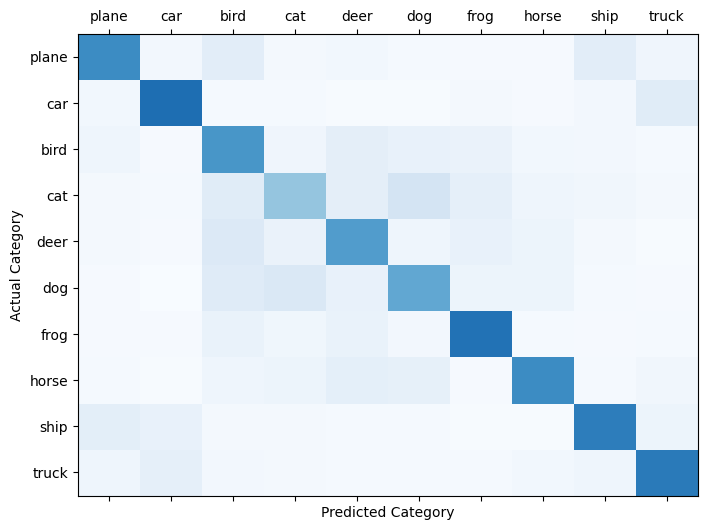

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(cm, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

## **Question:** 
Describe your experiments.
What parameters have you experimented with? What works and what doesn't? Why?   **(5 Points)**

**Your answer:** 
Before experimentation, i first tried running with the basic network settings, and see how it goes. on the very first try, the network recieved +-62% total accuracy score on the test set.
As requested (and although i wanted to) i did not do a large grid search.
I decided to fix the network layers, and play with the learning rate, the pooling layer, and the kernels.
Since i decided to fix the netowrk, i thought the learning rate was the most important parameter to use, and so most of my experimentation was with it. important to note that i played with them seperatly, i.e when one of them changed the other was fixed.
I tried increasing and decreasing the learning rate by scales of 10, 100, 1000, but all results were not as good as the original. i managed to move the result a litlle bit by verry small changes to the original. i believe the reason this occurd is because accidently the original learning rate was the sweet spot - or, this is a local maximum that i just couldnt get out of because i fixed other hyperparams and network architechture.
after playing with the LR, i tried to change the pooling type. i changed the max pooling to avg pooling, and the results got worse. i believe this is due to the images being too small and with pixel values similar to each other.
finaly, i played with the filter size (kernel) in the convolution. i found that smaller kernels gave results that werent as good as 4. maybe this is due to, as mentioned above, pixel colors being similar to each other which requires us to look on a bigger patch.

## **Question:** 
What can you learn from the confusion matrix? Why do you need additional evaluation methods other than accuracy? **(5 Points)**

**Your answer:** 
In general, accuracy never tells the whole story of a models performence. one of the problems with accuracy is that all errors arre given the same weights, and all truth are given the same weight - which sometimes is not the wanted condition. in a larger perspective, we can use many other metrics to tell the story of a model's performence such as prercision and recall that put different focuses on FP/TP/FN/TN. this might be especially important if the imbalances are present between classes in the dataset. in a toy example in which there are more TN the TP, a model can generralize well on TN and get high accuracy, but precision might be low (this is a classic case when trying to train models in the health fields). looking at only one metric might be misleading as to the quality of the model.
We can learn from the confusion matrix that generaly and relatively speaking class predictions are not bad. there are alot of mistakes (around 60% total accuracy), BUT some classes are more confused than others. for example - "ship" and "plane" are more oftenly confused. (which is counter intuitive for me as a human observer) but 2 classes that are confused and in my opinion are harder to differentiate is "truck" and "car".

# Localization as Regression (60 points)

In the next part, we will use a well known architecture called ResNet18 that was trained on ImageNet, a dataset far more rich than CIFAR10. ImageNet has 1,000 classes and 1,000,000 images. In this part, we will use the features extracted from ResNet18 to localize and classify images of cats and dogs. 

Using a pretrained network as a building block for a more complicated task is at the heart of neural networks today. By leveraging the features ResNet18 extracts, we can train a model that can correctly classify and localize cats and dogs using very few images. 

## Setup

In [18]:
import sys
print(sys.executable)

/Users/royrubin/opt/anaconda3/envs/DL_env/bin/python


In [19]:
import torchvision.transforms as transforms
import matplotlib.patches as patches
import torchvision.models as models
from torchvision.models import resnet18 as resnet18_base
from torchvision.models import ResNet18_Weights  # < --- verify that the conda env is up and running

In [20]:
from data.dataloader import *
import matplotlib.pyplot as plt
import torch.nn as nn
from PIL import Image
import collections
import time
import copy
import sys
import os

To load ResNet18 with the pretrained weights, use the following line. You are welcome to try different architectures, however they might require different input sizes or normalization.

The first time you run this cell the weights will be downloaded.

In [21]:
resnet18 = resnet18_base(weights=ResNet18_Weights.DEFAULT)  # this is not working because importing "ResNet18_Weights" fails for some strange reason

ResNet takes as input images of size (224,224). We will use PyTorch Transforms to change the size of the images. When ResNet18 was trained on ImageNet, the images were normalized using the mean and standard deviation of the images. In order to properly use the weights, we will use the same normalization.

In [22]:
data_transforms = {
    'train': transforms.Compose([
        Rescale((224,224)),
        ToTensor(),
        Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalizing according to imagenet
    ]),
    'val': transforms.Compose([
        Rescale((224,224)),
        ToTensor(),
        Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
root_dir = "data/animals/"
datasets = {x: VOCDetection(root_dir, image_set=x, transform=data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=32, shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val']}
classes = datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(dataset_sizes)

{'train': 636, 'val': 158}


In [23]:
# Get a batch of training data
sample = next(iter(dataloaders['train']))

In [24]:
def imshow(img, label_true=None, bbox_true=None, label_pred=None, bbox_pred=None):
    """
    Hidden assumption they use - the input is a sample with more than one image, thats why [0] everywhere
    can be cahnged, but i sticked with what was present here
    """
    ## Preparer image
    image = np.copy(img[0])
    image = np.transpose(image, (1, 2, 0))
    image *= np.array([0.229, 0.224, 0.225])
    image += np.array([0.485, 0.456, 0.406])
    plt.figure();
    fig, ax = plt.subplots(1, figsize=(12,9));
    ax.imshow(image);
    
    ## Prepare bboxes
    # True
    bbox_true = bbox_true[0]
    x1, y1, x2, y2 = bbox_true.numpy().reshape(-1) * 224
    box_w, box_h = np.abs(x2-x1), np.abs(y2-y1)
    bbox_true_patch = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, 
                             edgecolor='b', facecolor='none');
    ax.add_patch(bbox_true_patch);
    # True bbox label annotation
    label_true = label_true[0]
    ax.annotate(classes[label_true], (x1, y1), color='b', fontsize=14);
    
    # Pred
    if label_pred is not None and bbox_pred is not None:
        bbox_pred = bbox_pred[0]
        x1, y1, x2, y2 = bbox_pred.numpy().reshape(-1) * 224
        box_w, box_h = np.abs(x2-x1), np.abs(y2-y1)
        bbox_pred_patch = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, 
                                 edgecolor='r', facecolor='none');
        ax.add_patch(bbox_pred_patch);
        
        # True bbox label annotation
        label_pred = label_pred[0]
        ax.annotate(classes[label_pred], (x1, y1), color='r', fontsize=14);    



<Figure size 1200x800 with 0 Axes>

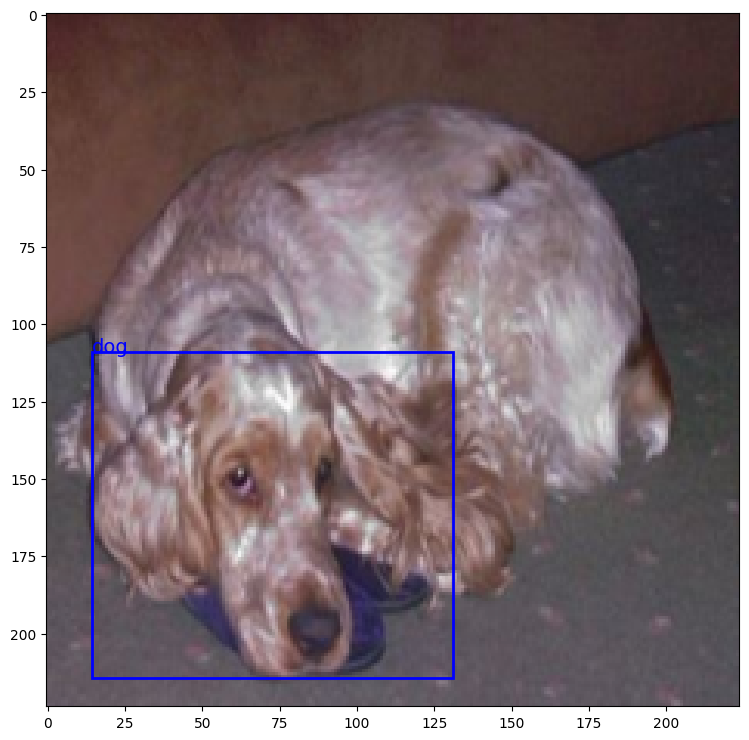

In [25]:
imshow(sample['image'],label_true=sample['label'],bbox_true=sample['bbox'])

## Prepare Model

In [26]:
from typing import TypedDict, Union

class ModelOutputFormat(TypedDict):
    class_predictions: torch.FloatTensor
    bounding_boxes: Union[torch.FloatTensor, None]
    
DEVICE = device

from collections import OrderedDict

In [27]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        #############################################################################
        # TO DO:                                                                    #
        # Load the pretrained ResNet-18 network and replace the top fully connected #  <--- top is first or last
        # layer, so we could use the features of the network and not the only      #
        # the classification layer which carries significantly less information.    #
        # Afterwards, create a new sequential model with the remaining layers of    #
        # the pretrained network. Next, define two additional models that take as   #
        # input the extracted features and output the class scores and bounding box #
        # coordinates.                                                              #
        # This function has no return value.                                        #
        #############################################################################
        
        ## Save the argument
        self.num_classes  = num_classes
        
        ## Set up models
        self._fe_model = self._prepare_resnet_feature_extractor()
        self.cls_model = self._perpare_classification_model()
        self.det_model = self._perpare_detection_model()

        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        
    ### Roys addition
    def _prepare_resnet_feature_extractor(self):
        ### get the model
        fe_model = resnet18_base(weights=ResNet18_Weights.DEFAULT)
        
        for param in fe_model.parameters():
            param.requires_grad = False
                
        fe_model.fc = nn.Linear(fe_model.fc.in_features, 256)  # Note: resnet18.fc.in_features (resnet's final layer) == 512  

        return fe_model
    
    def _perpare_classification_model(self):
        cls_model = nn.Sequential(OrderedDict([            
            ('relu1', nn.ReLU()),
            ('final_fc2', nn.Linear(256, self.num_classes)),
        ]))
        
        cls_model = cls_model.to(DEVICE)
        return cls_model
        
    def _perpare_detection_model(self):
        det_model_final = nn.Sequential(OrderedDict([            
            ('relu1', nn.ReLU()),
            ('final_fc2', nn.Linear(256, 128)),
            ('relu2', nn.ReLU()),
            ('final_fc3', nn.Linear(128, 64)),
            ('relu3', nn.ReLU()),
            ('final_fc4', nn.Linear(64, 4)),
        ]))
        
        det_model_final = det_model_final.to(DEVICE)
        return det_model_final
    
    
    def forward(self, images):
        #############################################################################
        # TO DO:                                                                    #
        # Define the forward propagation. You need to pass an image through the     #
        # network and extract the feature vector. In this case, when using a        #
        # predefined network, you don't want to change it's weights.                #
        # The rest of the layers you defined should accepts gradients for them to   #
        # improve during training.                                                  #
        # This function returns a class predication and a bounding box coordinates. #
        #############################################################################
            
        features_extracted = self._fe_model(images)
        cls_result = self.cls_model(features_extracted)
        det_result = self.det_model(features_extracted)

        return ModelOutputFormat(class_predictions= cls_result, bounding_boxes= det_result)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

## Guidelines

1. Complete the `train_model` function in the cell below. This function takes as input the model and additional hyper-parameters, and outputs the best model found on the validation set. 
2. To babysit the learning process, **you must track the classification accuracy, IoU score and loss on the training and validation datasets and visualize them** (using matplotlib or similar). I have included an implementation of the IoU metric in the file `data\dataloader.py`.
3. Do not perform a massive grid search. Use papers, blogs, MOOCs and online guides to research best hyper-parameters for your model.
4. You are encouraged to try Google Colab. If you have an CUDA capable GPU at home - you are welcome to use it.
5. **Include only your chosen architecture**. During experimentation, you may add as many cells as you need. Make sure to delete them before submission.
6. Training large neural networks may take a while. Make sure your code runs reasonably fast (~15 minutes on CPU and ~5 minutes on GPU).
7. Try to reach at least 90% classification accuracy and a IOU score of at least 0.60 on the validation set.
8. **In order to get full marks for this section explain the results and include visualizations.**.
9. You are given a general skeleton for the training function. Feel free to use any different structure.

In [28]:
from typing import Any, List, TypedDict, Dict

class TrainOutputFormat(TypedDict):
    model: Any
    avg_losses_cls: Dict[str, List[float]]
    avg_losses_det: Dict[str, List[float]]
    avg_iou: Dict[str, List[float]]
    total_accuracies: Dict[str, List[float]]

In [29]:
def calculate_total_iou_in_sample(pred_bbox_tensor, true_bbox_tensor):
    list_of_ious = [bb_intersection_over_union(pred, true) 
                    for pred, true in zip(pred_bbox_tensor, true_bbox_tensor)]
    # Note: pred and true above are rows of the ecieved tensor, each size 1x4
    list_of_ious = [item if type(item) == float else item.detach().numpy() for item in list_of_ious]
    return np.sum(list_of_ious).item()

In [30]:
def train_model(model, criterion_cls, criterion_bbox, optimizer, scheduler=None, num_epochs=5):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict()) # this is how a model is copied
    best_acc = 0.0
    
    # Added by roy
    ## gather for plotting later on
    acc_over_epochs = {'train': [], 'val': []}
    cls_loss_over_epochs = {'train': [], 'val': []}
    det_loss_over_epochs = {'train': [], 'val': []}
    iou_over_epochs = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('\nEpoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            print(f'\n*** Beginning phase {phase} ***\n')
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            
            running_loss_total = 0.0   # total loss of the network at each epoch
            running_loss_cls = 0.0   # total loss of the network at each epoch
            running_loss_det = 0.0   # total loss of the network at each epoch
            running_corrects = 0 # number of correct predictions
            running_iou = 0.0            # IoU score
            
            # Iterate over data.
            for index, sample in enumerate(dataloaders[phase]):
                #############################################################################
                # TO DO:                                                                    #
                # Extract the data from the dataloader, calculate the predictions of your   #
                # network and calculate the loss of the classification and bounding box     #
                # prediction. When in training mode, back-prop and update the weights.      #
                # At each epoch, calculate the test and train accuracy and IoU.             #
                # This function returns the best model in terms of accuracy.                #
                #############################################################################

                ## Unpack sample
                images = sample['image']
                true_cls = sample['label']
                true_bboxes = sample['bbox']
                batch_size = images.shape[0]
                
                ## zero the parameter gradients
                optimizer.zero_grad()
                
                ## Get model results
                model_output = model(images)           
                pred_cls = model_output['class_predictions']
                pred_bboxes = model_output['bounding_boxes']
                                
                ## backprop and step if in trarin mode
                if phase == 'train':
                    cls_loss = criterion_cls(pred_cls, true_cls)
                    det_loss = criterion_bbox(pred_bboxes, true_bboxes)
                    
                    factor = 15.0
                    joined_loss = cls_loss + det_loss * factor  # <---- Note !
                    joined_loss.backward()
                    
                    optimizer.step()

                # either way    
                # get correct predictions
                _, predicted = torch.max(pred_cls.data, 1)
                correct = (predicted == true_cls).sum().item()
                
                ## save running results
                running_loss_det += det_loss.item() * batch_size
                running_loss_cls += cls_loss.item() * batch_size
                running_loss_total = joined_loss.item() * batch_size
                running_corrects += correct
                
                running_iou += calculate_total_iou_in_sample(pred_bboxes, true_bboxes) # TODO: this is not vectorized
                
                #############################################################################
                #                             END OF YOUR CODE                              #
                #############################################################################
            
            # Calculate average stats over the entire dataset (this epoch)
            cls_epoch_loss = running_loss_cls / dataset_sizes[phase]
            det_epoch_loss = running_loss_det / dataset_sizes[phase]
            epoch_loss = running_loss_total / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            iou = running_iou / dataset_sizes[phase] # ORIG: iou = iou.item() / dataset_sizes[phase]
            
            # Added by roy
            ## gather for plotting later on
            acc_over_epochs[phase].append(epoch_acc)
            cls_loss_over_epochs[phase].append(cls_epoch_loss)
            det_loss_over_epochs[phase].append(det_epoch_loss)
            iou_over_epochs[phase].append(iou)
            
            print('{} Loss: {:.4f}  |  Acc: {:.4f}  |  IOU: {:.4f}'.format(
                phase, epoch_loss, epoch_acc, iou))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
            time_elapsed = time.time() - since
            print('Phase complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    
        time_elapsed = time.time() - since
        print('Epoch complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    #
    return TrainOutputFormat(model=model, 
                             avg_losses_cls=cls_loss_over_epochs, 
                             avg_losses_det=det_loss_over_epochs, 
                             avg_iou=iou_over_epochs, 
                             total_accuracies=acc_over_epochs)

Choose your optimizer and the loss functions for the classification and bounding box regression.

In [31]:
import torch.optim as optim
from torchvision.ops import distance_box_iou_loss

cnn = CNN(2)
cnn = cnn.to(device)

criterion_cls = None
criterion_bbox = None
optimizer = None
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
# Define number of epochs
NUM_OF_EPOCHS = 7  # <-- change to 10 on a stronger machine than my computer 

# Choose Loss function
criterion_cls = nn.CrossEntropyLoss()  # nn.CrossEntropyLoss()
criterion_bbox = nn.MSELoss()  #

# Choose optimizer params + optimizer algorithm
optimizer_hps = {
    'lr': 0.001,  
}
optimizer = optim.Adam(params=cnn.parameters(), **optimizer_hps)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

In [32]:
%%time
train_output = train_model(cnn, criterion_cls, criterion_bbox, optimizer, num_epochs=NUM_OF_EPOCHS)


Epoch 1/7
----------

*** Beginning phase train ***

train Loss: 0.0254  |  Acc: 0.8412  |  IOU: 0.6143
Phase complete in 1m 13s

*** Beginning phase val ***

val Loss: 0.1095  |  Acc: 0.9873  |  IOU: 0.7173
Phase complete in 1m 48s
Epoch complete in 1m 48s

Epoch 2/7
----------

*** Beginning phase train ***

train Loss: 0.0159  |  Acc: 0.9811  |  IOU: 0.7223
Phase complete in 3m 5s

*** Beginning phase val ***

val Loss: 0.0686  |  Acc: 0.9937  |  IOU: 0.7190
Phase complete in 3m 40s
Epoch complete in 3m 40s

Epoch 3/7
----------

*** Beginning phase train ***

train Loss: 0.0125  |  Acc: 0.9811  |  IOU: 0.7319
Phase complete in 4m 53s

*** Beginning phase val ***

val Loss: 0.0540  |  Acc: 0.9873  |  IOU: 0.7333
Phase complete in 5m 27s
Epoch complete in 5m 27s

Epoch 4/7
----------

*** Beginning phase train ***

train Loss: 0.0181  |  Acc: 0.9780  |  IOU: 0.7388
Phase complete in 6m 38s

*** Beginning phase val ***

val Loss: 0.0782  |  Acc: 0.9873  |  IOU: 0.7512
Phase complete 

In [33]:
best_model = train_output['model']

Once you are pleased with your results, see how your model can predict and localize cats and dogs!

In [42]:
%%time
# Get a batch of validation data
sample = next(iter(dataloaders['val']))

CPU times: user 25.2 ms, sys: 72.1 ms, total: 97.2 ms
Wall time: 23.4 s


In [43]:
%%time
with torch.no_grad():
    images = sample['image']
    images = images.to(device)
    
    model_output = best_model(images)
    
    label_pred = model_output['class_predictions']
    bbox_pred = model_output['bounding_boxes']

    _, label_pred = torch.max(label_pred, 1)

CPU times: user 2.14 s, sys: 324 ms, total: 2.46 s
Wall time: 2.59 s


<Figure size 1200x800 with 0 Axes>

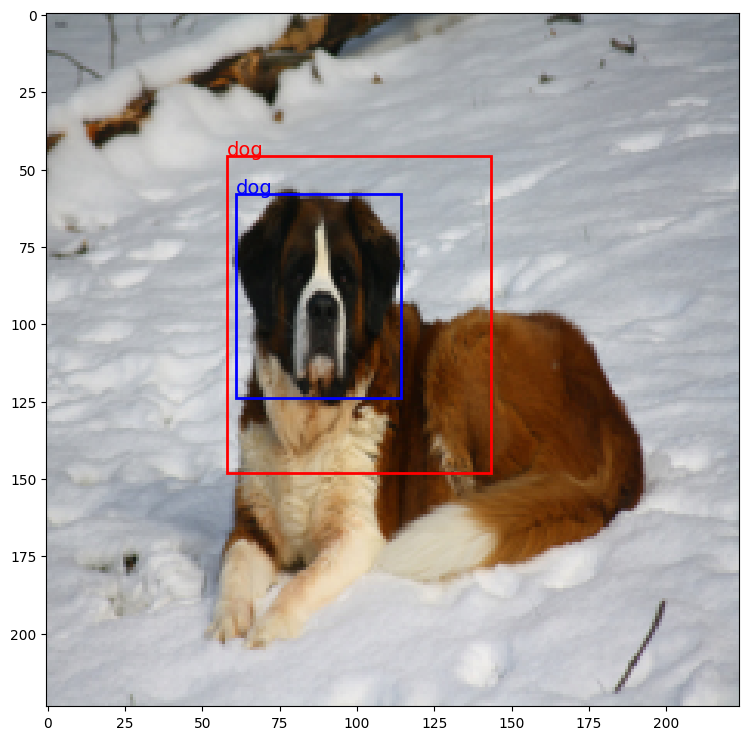

In [44]:
imshow(sample['image'], 
       label_true=sample['label'], bbox_true=sample['bbox'], 
       label_pred=label_pred.cpu(), bbox_pred=bbox_pred.cpu())

In [37]:
def plot_graph(res: list, graph_type: str):  # , n_epochs: int  ... == len(res)
    # plt.figure(0)
    plt.plot(list(range(len(res['train']))), res['train'], 'r--', label=graph_type + ' Train')
    plt.plot(list(range(len(res['val']))), res['val'], 'b--', label=graph_type + ' Val')
    plt.title(f'{graph_type} change per epoch')  #     plt.title(f'{graph_type} change per epoch\nnum of epochs: {n_epochs}. \nhps: {}')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(graph_type)
    plt.show()

Your visualizations here (IoU / Accuracy / Loss on training and validation datasets as a function of the epoch). Only visualize the results of your best model.

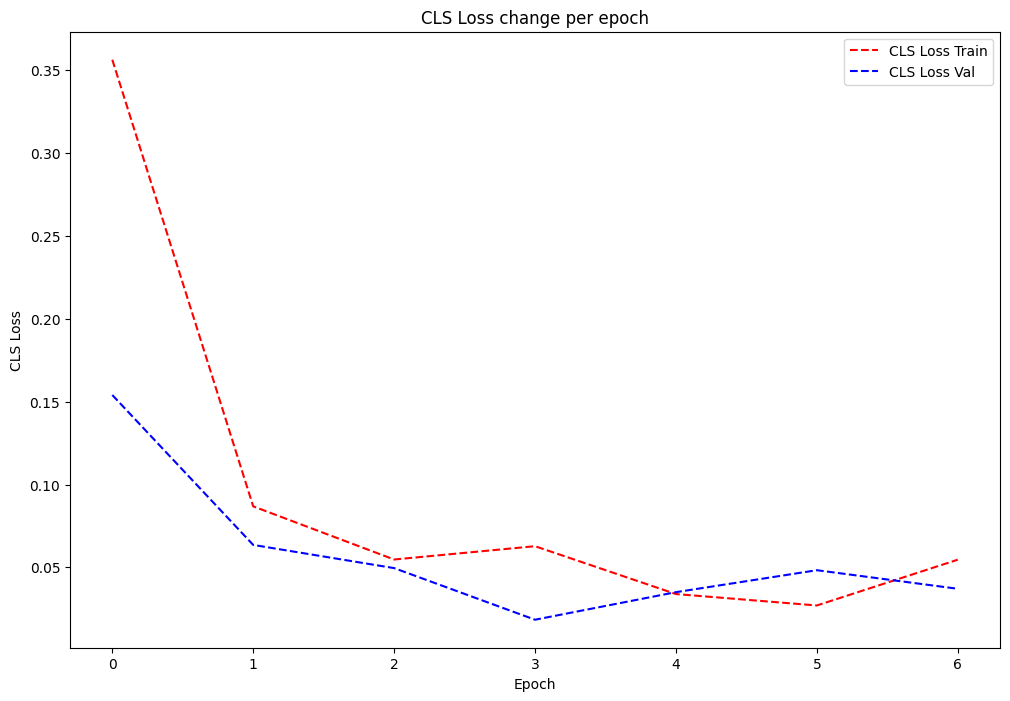

CPU times: user 329 ms, sys: 32.1 ms, total: 361 ms
Wall time: 243 ms


In [38]:
%%time
plot_graph(res=train_output['avg_losses_cls'], graph_type='CLS Loss')

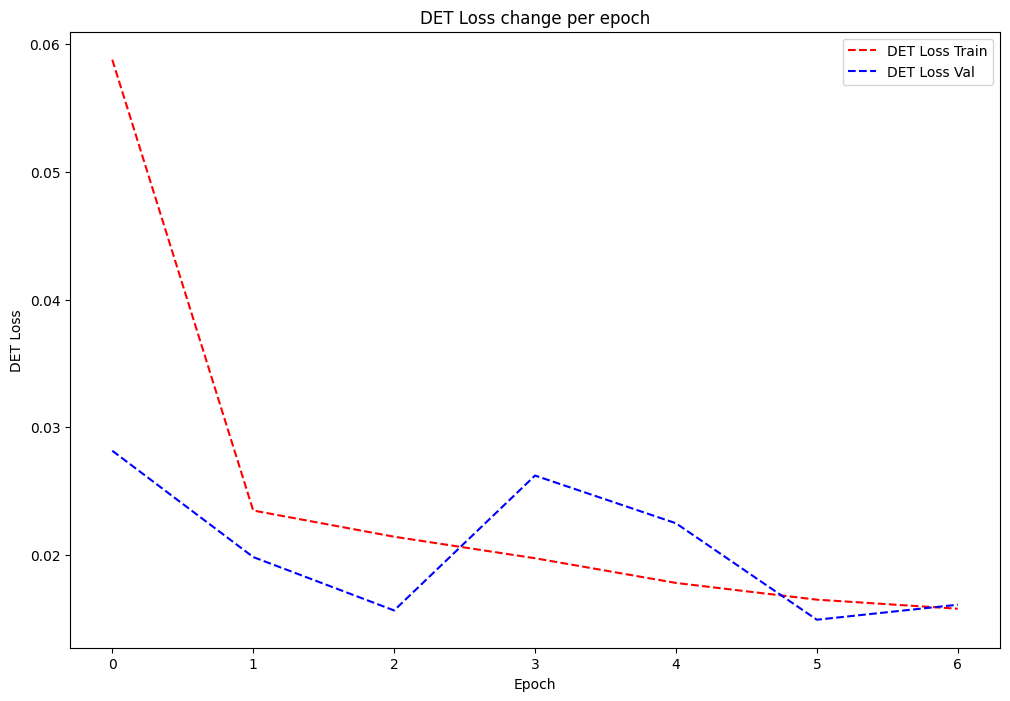

CPU times: user 324 ms, sys: 29.3 ms, total: 354 ms
Wall time: 232 ms


In [39]:
%%time
plot_graph(res=train_output['avg_losses_det'], graph_type='DET Loss')

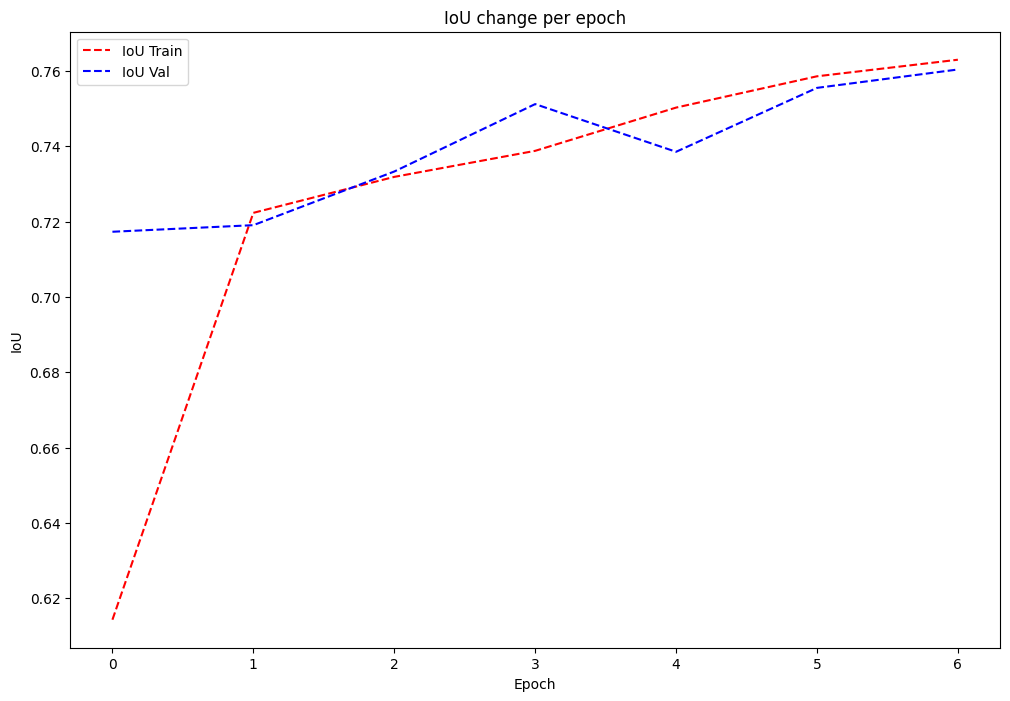

CPU times: user 328 ms, sys: 30.6 ms, total: 359 ms
Wall time: 238 ms


In [40]:
%%time
plot_graph(res=train_output['avg_iou'], graph_type='IoU')

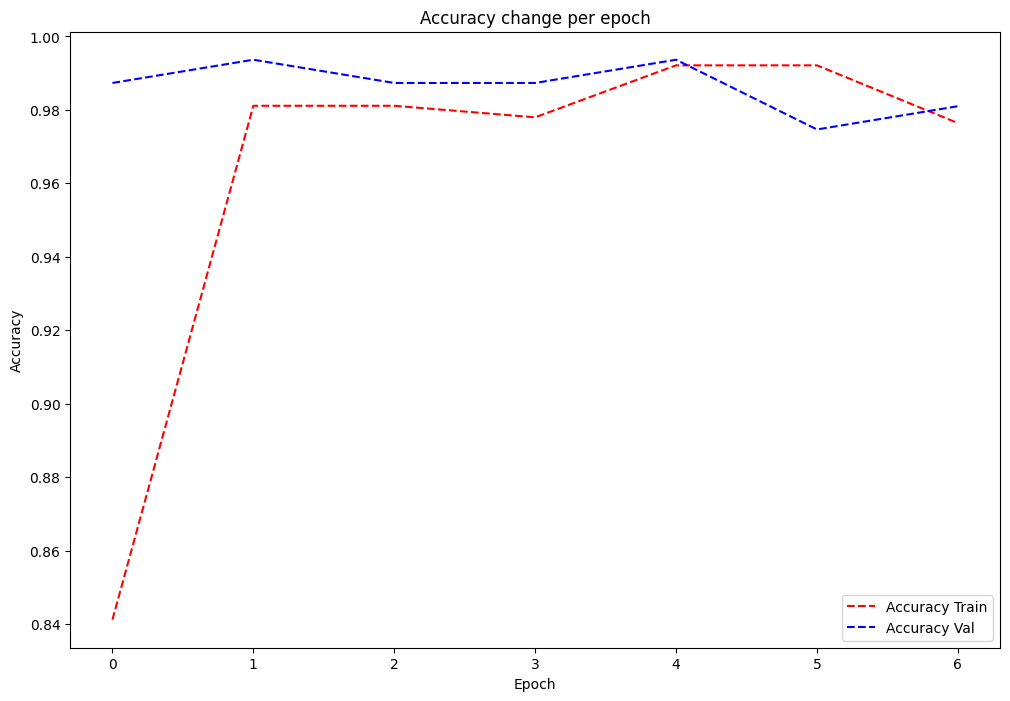

CPU times: user 330 ms, sys: 28.2 ms, total: 359 ms
Wall time: 245 ms


In [41]:
%%time
plot_graph(res=train_output['total_accuracies'], graph_type='Accuracy')

### Model explanation
- The model is built of 3 modules:
    - the feature extractor (fe_model)
    - the classifier (CLS)
    - the detector (DET)
- the fe_model extrracts features once, and sends them to the forward method of the two other models. (saves time instead of defining 2 models each with their own copy of resnet - which i initialy did, and was very time consuming).
- the fe_model is resnet18, with all gradients on freeze so what was learned on imagenet will not be forgotten. the last layer is changed in order to reduce dimensions towards our own number of classes (2 instead of 1000).
- the CLS model is very simple, and just takes the resnets result and performs a single relu and fully connected layer. as we can see from the results, this is more than enough.
- the DET generaly is the same as the CLS, times 3.
- i did experiment with more layers, but since my computer is slow and i wanted everything to run in under 15 mins, i removed them from the final model submitted here.
- the optimizer chosen for the task is Adam as it is well recommended in various forums and blogs.
- i used a relatively big learning rate, which you can see in the graphs above, affected the results greatly. see explanation below

### Results Explanations:
- we can see that over the epochs the model results over the train data improve gradually. 
- train loss values (DET and CLS) degrades over time, which is the expected result. the small ups and downs in the loss functions can probably be explained by the fact that the learning rate is rerlatively big, and that there is no learning rate schedule or decay, or to the fact there are very few epochs to train with, and in a larger perspective of say 1000 epochs, this would be a small bump in a large steep descent.
- val loss values (DET and CLS) aer flactuating, which is fine because the model is not learning this set of images.
- the small drop of accurracy is the end correlates in my opinion with the increase of IOU, the small jump of CLS loss, and the decrease of DET loss. see bullet above for my opinion as to why this happened.
- that said, generaly speaking the train iou and accuracy surpassed or got close to the val results, which is good, and in my opinion it means there is not overfitting.
- i added to the "imshow" function the true bbox, to compare it with the predicted bbox. it is not bad (as we know the IOU could improve).

### Note
I did not use GPU in any parrt of running this notebook. on my VERY SLOW computer, part A ran in under 15 mins, and part B also ran underr 15 mins. on a GPU i could probably add more epochs.